In [ ]:
!nvidia-smi

Mon May 13 04:56:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
ROOT='/content/drive/MyDrive/LPDB'

In [ ]:
data=f"{ROOT}/data"
try:
    os.mkdir(data)
except FileExistsError:
    pass
os.chdir(ROOT)
print(os.getcwd())

/content/drive/MyDrive/LPDB


In [ ]:
# Pip install method (recommended)
%cd
!pip install ultralytics==8.0.112

from IPython import display
display.clear_output()

In [ ]:
# check if installed correctly
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.112 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

import os
from IPython import display
from IPython.display import Image


In [ ]:
DATASET_NAME = "blp_text_v5_yoloV8"
DATASET_DIR = f"{ROOT}/data/{DATASET_NAME}"

In [ ]:
try:
    os.mkdir(DATASET_DIR)
except FileExistsError:
    pass

In [ ]:
%cd {ROOT}
%pwd

/content/drive/MyDrive/LPDB


'/content/drive/MyDrive/LPDB'

In [ ]:
MODEL_PATH = f"{ROOT}/yolov8m.pt"
DATA_YAML = f"{DATASET_DIR}/data.yaml"

BLP_Text_Model_Dir = f"{ROOT}/model_blp_text_extraction"

PROJECT_NAME = "blp_text_trained_weights"
PROJECT_PATH = f"{BLP_Text_Model_Dir}/{PROJECT_NAME}"


In [ ]:
print("Model Path: ", MODEL_PATH)
print("Data Yaml: ", DATA_YAML)

Model Path:  /content/drive/MyDrive/LPDB/yolov8m.pt
Data Yaml:  /content/drive/MyDrive/LPDB/data/blp_text_v5_yoloV8/data.yaml


In [ ]:
%cd {BLP_Text_Model_Dir}

/content/drive/.shortcut-targets-by-id/1h9mjy6hjc4EgDF8z9W3U7yf8TAFMxvU_/model_blp_text_extraction


In [ ]:
model = YOLO(MODEL_PATH)

In [ ]:
model.train(
    data=DATA_YAML,
    epochs=75,
    patience=10,
    batch=32,
    imgsz=640,
    workers=16,
    cache=True,
    project=PROJECT_NAME,
    seed=3,
    plots=True,
)

#from IPython import display

#display.clear_output()

New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.112 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/LPDB/yolov8m.pt, data=/content/drive/MyDrive/LPDB/data/blp_text_v5_yoloV8/data.yaml, epochs=75, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=16, project=blp_text_trained_weights, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=3, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1,

In [ ]:
last_pt = YOLO(f"{PROJECT_PATH}/train5/weights/last.pt")

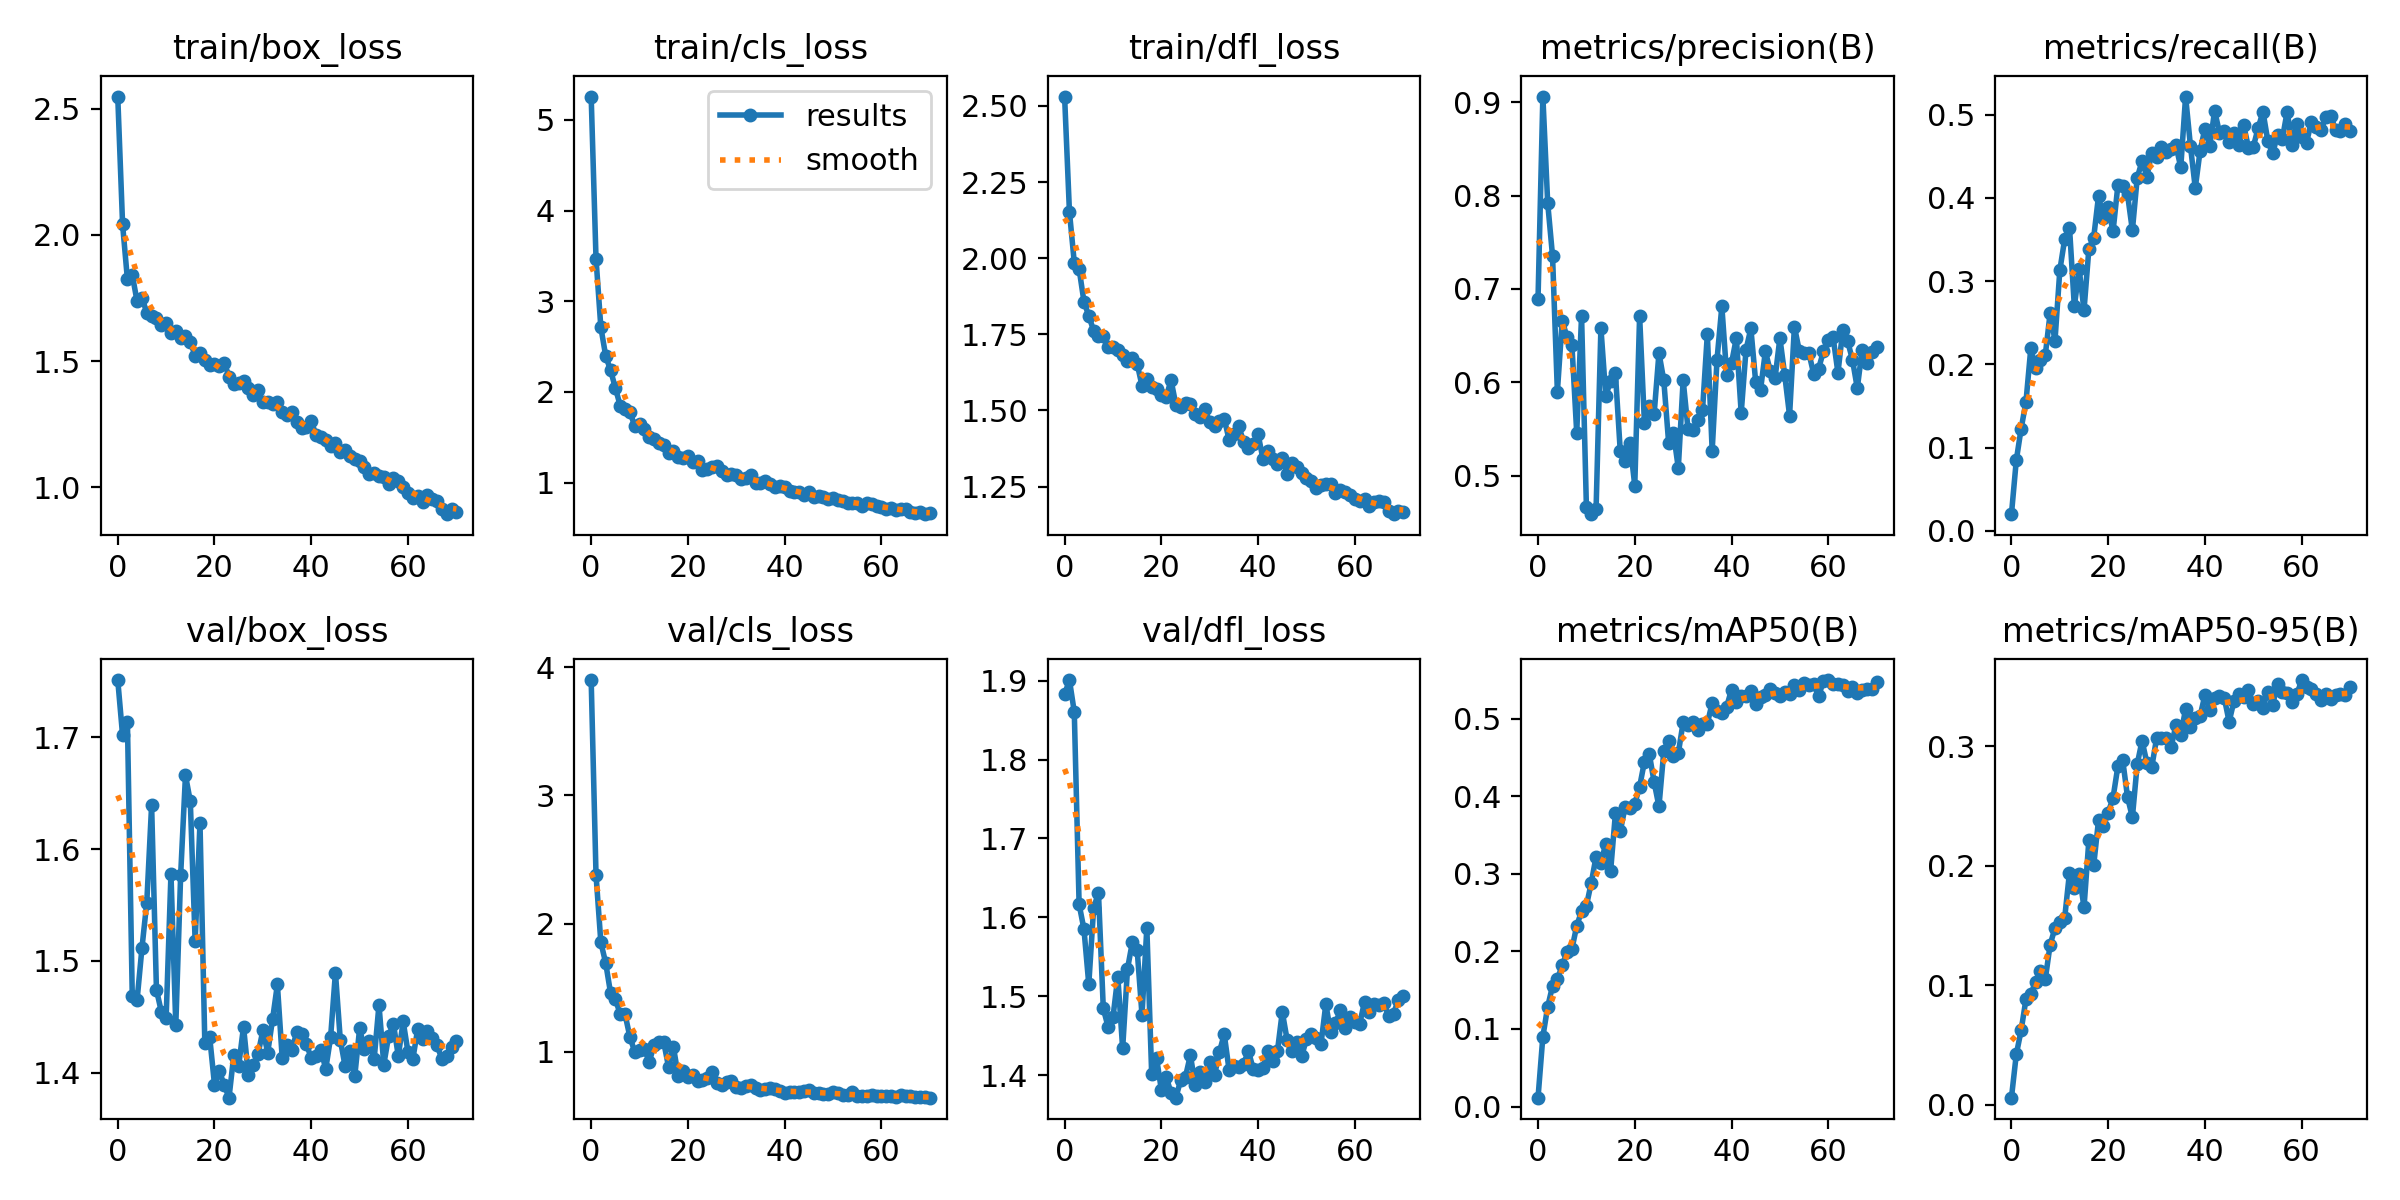

In [ ]:
Image(filename=f"{PROJECT_PATH}/train5/results.png", width=600)

In [ ]:
best_pt = YOLO(f"{PROJECT_PATH}/train5/weights/best.pt")

In [ ]:
val_metrics = best_pt.val()

Ultralytics YOLOv8.0.112 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25898239 parameters, 0 gradients
val: Scanning /content/drive/.shortcut-targets-by-id/1z4RWxyZp4dtbMm22CXYBeQt6gJru00pE/data/blp_text_v5_yoloV8/valid/labels.cache... 826 images, 0 backgrounds, 0 corrupt: 100%|██████████| 826/826 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1z4RWxyZp4dtbMm22CXYBeQt6gJru00pE/data/blp_text_v5_yoloV8/valid/images/197_jpeg.rf.16ab24f820bc496da849f4b99c612197.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 6848. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is mu

In [ ]:
test_metrics = best_pt.val(split="test")

Ultralytics YOLOv8.0.112 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/.shortcut-targets-by-id/1z4RWxyZp4dtbMm22CXYBeQt6gJru00pE/data/blp_text_v5_yoloV8/test/labels... 660 images, 0 backgrounds, 0 corrupt: 100%|██████████| 660/660 [13:45<00:00,  1.25s/it]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1z4RWxyZp4dtbMm22CXYBeQt6gJru00pE/data/blp_text_v5_yoloV8/test/images/289_jpg.rf.09260723a27cfcdc2df36df7a6d132b1.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1z4RWxyZp4dtbMm22CXYBeQt6gJru00pE/data/blp_text_v5_yoloV8/test/images/315_jpg.rf.07605a2570b731ee225e8e2d72111552.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1z4RWxyZp4dtbMm22CXYBeQt6gJru00pE/data/blp_text_v5_yoloV8/test/images/335_jpg.rf.58d1bbfa32c4f70f80943bee2bf2d6d4.jpg: 1 duplicate labels removed
val: New cache created: /content/drive/.shortcut-targets-by-id/1z4RWxyZp4dtbMm22CXYBeQt6gJru00p